Performing baseline measurements on measured QRNG dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('data/IBM_Superposition_QRNG_100qubit.txt', names=['binary_string', 'quantum', 'QPU'], sep=' ')
quantum_data = data[:40000]
quantum_data

,binary_string,quantum,QPU
0,0001011100100011110100100001101111000011010101...,quantum,ibm_brisbane
1,0110101010000001110100000100111101101111110111...,quantum,ibm_brisbane
2,1001001010000000001111010010111000100011110000...,quantum,ibm_brisbane
3,0101100101110010001001011000011010111011101101...,quantum,ibm_brisbane
4,1000101001000000111110011000010111010011111110...,quantum,ibm_brisbane
...,...,...,...
39995,0010010110101100011000101110101101010110000011...,quantum,ibm_sherbrooke
39996,1101001111000011101100001011011000010001100011...,quantum,ibm_sherbrooke
39997,0010000101001010011001111001100100011011100000...,quantum,ibm_sherbrooke
39998,0010110101100001001111101000111100010111111000...,quantum,ibm_sherbrooke


In [5]:
# Step 1: get 1 and 0 counts for each qubit (100 qubit QRNG circuit).
# Since it's binary data, getting the counts of all 1s will give us a distribution of 1s and 0s

qubit_one_counts = [0] * 100

for binary_string in quantum_data['binary_string']:
    for i in range(100):
        if binary_string[i] == '1':
            qubit_one_counts[i] += 1

qubit_one_counts

[20111,
 20277,
 20086,
 20667,
 20016,
 19975,
 20503,
 20171,
 19716,
 19458,
 20025,
 19828,
 19113,
 20037,
 19914,
 19744,
 19235,
 20217,
 19680,
 19585,
 19992,
 15543,
 19605,
 18977,
 20275,
 19862,
 19830,
 20086,
 20053,
 18101,
 20099,
 18076,
 20079,
 19056,
 19835,
 19231,
 20277,
 19469,
 21113,
 19633,
 19469,
 19799,
 20235,
 14755,
 19189,
 20007,
 20813,
 20030,
 20271,
 19867,
 19674,
 20139,
 20171,
 19297,
 19441,
 19807,
 20300,
 19916,
 20155,
 19291,
 19959,
 19810,
 19573,
 19514,
 20348,
 20704,
 20411,
 19905,
 20317,
 20512,
 20051,
 20886,
 19523,
 19972,
 19640,
 22367,
 20237,
 18902,
 20420,
 21821,
 19635,
 19835,
 20245,
 20971,
 20026,
 19514,
 19853,
 18895,
 19775,
 20211,
 19842,
 20580,
 19742,
 19452,
 19983,
 20172,
 20278,
 20098,
 20744,
 18230]

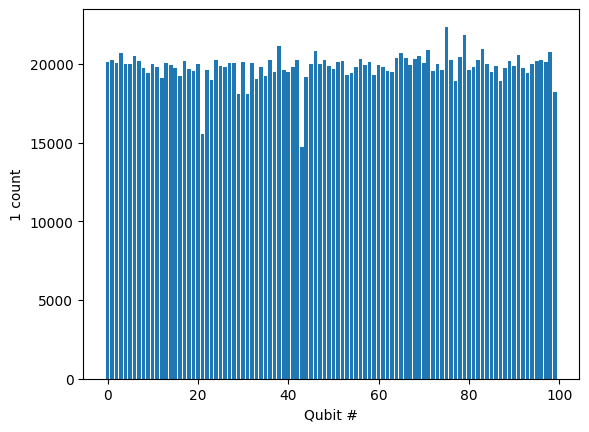

<Figure size 3000x1500 with 0 Axes>

In [6]:
x = [i for i in range(100)]

plt.bar(x, height=qubit_one_counts)

plt.xlabel('Qubit #')
plt.ylabel('1 count')

plt.figure(figsize=(30, 15))

plt.show()

Clearly there is signficiant variation in measurement error. Now we check for individual QPUs

In [7]:
ibm_brisbane = quantum_data[:10000]
ibm_kyoto = quantum_data[10000:20000]
ibm_osaka = quantum_data[20000:30000]
ibm_sherbrooke = quantum_data[30000:40000]
devices = [ibm_brisbane, ibm_kyoto, ibm_osaka, ibm_sherbrooke]

In [28]:
oneCounts = []
for i in range(4):
    oneCounts.append([0] * 100)
for count, device_data in enumerate(devices):
    for binary_string in device_data['binary_string']:
        for i in range(0, 100):
            if binary_string[i] == '0':
                oneCounts[count][i] += 1

print(oneCounts[0])
print(oneCounts[1])
print(oneCounts[2])
print(oneCounts[3])

[4928, 4977, 5187, 4577, 5076, 4898, 4867, 4909, 5279, 4991, 4875, 5133, 5133, 4950, 4918, 4986, 5120, 4724, 5255, 5071, 4996, 5169, 4954, 5030, 4914, 4986, 4943, 4970, 4956, 4950, 4992, 5004, 5161, 5131, 5052, 5028, 5174, 5154, 4923, 4865, 5052, 5029, 5060, 4983, 5144, 5080, 4841, 4947, 5131, 5064, 5039, 4993, 5048, 5094, 5219, 5079, 4932, 4934, 5027, 4948, 4899, 5063, 5684, 4935, 4780, 4551, 5005, 4947, 5005, 4848, 4956, 4702, 5030, 4964, 5026, 2572, 5055, 5064, 4968, 3820, 5026, 5020, 4886, 5049, 5153, 5345, 5013, 4922, 4865, 4978, 4987, 5031, 5170, 5075, 4953, 5051, 4784, 5007, 4653, 4876]
[5046, 4746, 4717, 4845, 4919, 4974, 4757, 4996, 5025, 5392, 4991, 4991, 5774, 4836, 4973, 4802, 5569, 5044, 4973, 5330, 4909, 5000, 4614, 5646, 4804, 4964, 5094, 4819, 5028, 6483, 4826, 5134, 5033, 6398, 5031, 5008, 4996, 4927, 5098, 4933, 4873, 5103, 4846, 5173, 5060, 4962, 4909, 5053, 4687, 4935, 5063, 4717, 4707, 5015, 4986, 4992, 5077, 4988, 4915, 5018, 5075, 5275, 4817, 4908, 4851, 5041, 45

Now we will try to extract if there is qubit crosstalk - i.e. if the measurement of a qubit effects the next qubit in the chain